# 데이터 불러오기

In [ ]:
import pandas as pd
from glob import glob
import os
import numpy as np
from tqdm import tqdm, tqdm_notebook
import plotly.offline as pyo
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from datetime import datetime
from datetime import date

In [ ]:
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook"

In [ ]:
pd.options.display.float_format = '{:.4f}'.format

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
%matplotlib inline
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)  

In [ ]:
#pd.set_option('display.max_columns',None) # 전체 열 출력하기
#pd.set_option('display.max_rows',None) # 전체 행 출력하기

In [ ]:
# go to file
os.chdir('../DATA_raw2')

In [ ]:
user = pd.read_pickle("../TBWA/user_fin.pkl")
order = pd.read_pickle("../TBWA/order_fin.pkl")

In [ ]:
user_info = pd.read_pickle('../DATA_raw2/도소매제거info.pkl')

In [ ]:
print(len(user))
print(len(order))

1907989
4928381


# 비구매자 분석

In [ ]:
data = order.groupby('고유번호', as_index=False).agg({'구매일자':'nunique'})
yes = user[user.고유번호.isin(data.고유번호.unique())]

In [ ]:
yes['c_PC로그인횟수(누적)'] = yes['PC로그인횟수_2020'] + yes['PC로그인횟수_2021'] + yes['PC로그인횟수_2022']
yes['c_모바일로그인횟수(누적)'] = yes['모바일로그인횟수_2020'] + yes['모바일로그인횟수_2021'] + yes['모바일로그인횟수_2022']
yes['c_앱로그인횟수(누적)'] = yes['앱로그인횟수_2020'] + yes['앱로그인횟수_2021'] + yes['앱로그인횟수_2022']
yes['총 로그인횟수'] = yes['c_PC로그인횟수(누적)'] + yes['c_모바일로그인횟수(누적)'] + yes['c_앱로그인횟수(누적)']
yes['c_년간포인트사용액(누적)'] = yes['년간포인트사용액_2020'] + yes['년간포인트사용액_2021'] + yes['년간포인트사용액_2022']
yes['c_출석체크_응모건수(누적)'] = yes['출석체크_응모건수_2020'] + yes['출석체크_응모건수_2021'] + yes['출석체크_응모건수_2022']
yes['c_출석체크_응모건수(누적)'] = yes['출석체크_응모건수_2020'] + yes['출석체크_응모건수_2021'] + yes['출석체크_응모건수_2022']
yes['c_출석체크_참여일수(누적)'] = yes['출석체크_참여일수_2020'] + yes['출석체크_참여일수_2021'] + yes['출석체크_참여일수_2022']
yes['c_일반이벤트_응모건수(누적)'] = yes['일반이벤트_응모건수_2020'] + yes['일반이벤트_응모건수_2021'] + yes['일반이벤트_응모건수_2022']
yes['c_드로우 응모건수(누적)'] = yes['드로우 응모건수_2020'] + yes['드로우 응모건수_2021'] + yes['드로우 응모건수_2022']

In [ ]:
yes = yes [['고유번호', '성별', '연령대', '주소', '가입처', '최초가입일', '최종가입일', '최종탈퇴일', '재가입횟수',
        '리뷰작성건수', '연령대2',
       'c_PC로그인횟수(누적)', 'c_모바일로그인횟수(누적)', 'c_앱로그인횟수(누적)', '총 로그인횟수',
       'c_년간포인트사용액(누적)', 'c_출석체크_응모건수(누적)', 'c_출석체크_참여일수(누적)',
       'c_일반이벤트_응모건수(누적)', 'c_드로우 응모건수(누적)']]

In [ ]:
# 구매자 특징
a_1 = yes.describe().T.reset_index()
a_1

In [ ]:
# 0값들을 제외하고
df = pd.DataFrame()
for i in a_1['index'].unique() : 
    a = yes[yes[i] != 0].reset_index(drop=True)
    a = a.describe()[i].reset_index().set_index('index').T
    fin = a
    df = df.append(fin, ignore_index=True)
ee = pd.DataFrame({'변수 명' : a_1['index'].unique()})
ee = pd.concat([ee,df], axis =1).reset_index(drop=True)
ee

### 비구매자 특징

In [ ]:
data = order.groupby('고유번호', as_index=False).agg({'구매일자':'nunique'})
non = user[~user.고유번호.isin(data.고유번호.unique())]

In [ ]:
a_1 = non.describe().T.reset_index()
a_1

In [ ]:
# 0값들을 제외하고
df = pd.DataFrame()
for i in a_1['index'].unique() : 
    a = non[non[i] != 0].reset_index(drop=True)
    a = a.describe()[i].reset_index().set_index('index').T
    fin = a
    df = df.append(fin, ignore_index=True)
ee = pd.DataFrame({'변수 명' : a_1['index'].unique()})
ee = pd.concat([ee,df], axis =1).reset_index(drop=True)
ee

In [ ]:
# 성별
sex = non.groupby(['성별'],as_index = False).agg({'고유번호':'count'}).sort_values(by=['성별'], ascending = True)

fig = px.pie(sex, values='고유번호', names='성별', title='비구매자 성별비율', color = '성별', 
             color_discrete_map={ 'F': '#CD5C5C','M': '#4169E1'}) 
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
age = non.groupby(['연령대'],as_index = False).agg({'고유번호':'count'}).sort_values(by=['연령대'], ascending = True)
age['퍼센트'] = age['고유번호'] / age['고유번호'].sum() *100

# 연령별 차이
# plotting
fig = px.bar(age, 
              x='연령대', 
              y='퍼센트', 
              title='연령 구성', color="연령대", text_auto='.3s')
fig.update_layout(xaxis_title='연령대',
                  yaxis_title='퍼센트')

#fig.show()

### 이벤트 참여, 온라인 접속 비교

In [ ]:
non['연령대2']='60세 이상'
non['연령대2'] = np.where(non['연령대']=='19세 미만', '10대 이하',non['연령대2'])
non['연령대2'] = np.where((non['연령대']=='20-24세')|(non['연령대']=='25-29세'), '20대', non['연령대2'])
non['연령대2'] = np.where((non['연령대']=='30~34세')|(non['연령대']=='35~39세'), '30대',non['연령대2'])
non['연령대2'] = np.where((non['연령대']=='40~44세')|(non['연령대']=='45~49세'), '40대',non['연령대2'])
non['연령대2'] = np.where((non['연령대']=='50~54세')|(non['연령대']=='55~59세'), '50대',non['연령대2'])

In [ ]:
non_list = ['c_PC로그인횟수(누적)', 'c_모바일로그인횟수(누적)', 'c_앱로그인횟수(누적)', '총 로그인횟수',
       'c_년간포인트사용액(누적)', 'c_출석체크_응모건수(누적)', 'c_출석체크_참여일수(누적)',
       'c_일반이벤트_응모건수(누적)', 'c_드로우 응모건수(누적)']

In [ ]:
non['c_PC로그인횟수(누적)'] = non['PC로그인횟수_2020'] + non['PC로그인횟수_2021'] + non['PC로그인횟수_2022']
non['c_모바일로그인횟수(누적)'] = non['모바일로그인횟수_2020'] + non['모바일로그인횟수_2021'] + non['모바일로그인횟수_2022']
non['c_앱로그인횟수(누적)'] = non['앱로그인횟수_2020'] + non['앱로그인횟수_2021'] + non['앱로그인횟수_2022']
non['총 로그인횟수'] = non['c_PC로그인횟수(누적)'] + non['c_모바일로그인횟수(누적)'] + non['c_앱로그인횟수(누적)']
non['c_년간포인트사용액(누적)'] = non['년간포인트사용액_2020'] + non['년간포인트사용액_2021'] + non['년간포인트사용액_2022']
non['c_출석체크_응모건수(누적)'] = non['출석체크_응모건수_2020'] + non['출석체크_응모건수_2021'] + non['출석체크_응모건수_2022']
non['c_출석체크_응모건수(누적)'] = non['출석체크_응모건수_2020'] + non['출석체크_응모건수_2021'] + non['출석체크_응모건수_2022']
non['c_출석체크_참여일수(누적)'] = non['출석체크_참여일수_2020'] + non['출석체크_참여일수_2021'] + non['출석체크_참여일수_2022']
non['c_일반이벤트_응모건수(누적)'] = non['일반이벤트_응모건수_2020'] + non['일반이벤트_응모건수_2021'] + non['일반이벤트_응모건수_2022']
non['c_드로우 응모건수(누적)'] = non['드로우 응모건수_2020'] + non['드로우 응모건수_2021'] + non['드로우 응모건수_2022']

In [ ]:
non = non [['고유번호', '성별', '연령대', '주소', '가입처', '최초가입일', '최종가입일', '최종탈퇴일', '재가입횟수',
        '리뷰작성건수', '연령대2',
       'c_PC로그인횟수(누적)', 'c_모바일로그인횟수(누적)', 'c_앱로그인횟수(누적)', '총 로그인횟수',
       'c_년간포인트사용액(누적)', 'c_출석체크_응모건수(누적)', 'c_출석체크_참여일수(누적)',
       'c_일반이벤트_응모건수(누적)', 'c_드로우 응모건수(누적)']]

In [ ]:
n20 = non[non.연령대2 == '20대']
a_1 = n20.describe().T.reset_index()
a_1

In [ ]:
# 0 제외하고
df = pd.DataFrame()
for i in a_1['index'].unique() : 
    a = n20[n20[i] != 0].reset_index(drop=True)
    a = a.describe()[i].reset_index().set_index('index').T
    fin = a
    df = df.append(fin, ignore_index=True)
ee = pd.DataFrame({'변수 명' : a_1['index'].unique()})
ee = pd.concat([ee,df], axis =1).reset_index(drop=True)
ee

In [ ]:
non[non.연령대2 == '30대'].describe().iloc[:,2:]

In [ ]:
non[non.연령대2 == '40대'].describe().iloc[:,2:]

In [ ]:
non[non.연령대2 == '50대'].describe().iloc[:,2:]

In [ ]:
non[non.연령대2 == '60세 이상'].describe().iloc[:,2:]

# 3. 2 구매 패턴 분석

- 먼저, 전체 회원 190만 7989명 중 구매경험이 있는 고객이 136만 6480명, 없는 고객이 541509명임.
- 아래 구매 주기 분석은 구매경험이 있는 고객 136만 6480명으로 한정해서 진행

### 일회성 구매자(=구매주기 0일) 특징

In [ ]:
len(user_info)

In [ ]:
# 구매횟수가 1건인 회원
# 구매횟수가 2건이상인 회원
data = order.groupby('고유번호', as_index=False).agg({'구매일자':'nunique'})
data

In [ ]:
list = []
for i in range(len(data)) : 
    if data['구매일자'][i] == 1:
        list.append('1회 구매')
    else:
        list.append('1회 이상 구매')
data['1회 여부'] = list

In [ ]:
one = data.groupby(['1회 여부'],as_index = False).agg({'고유번호':'nunique'}).sort_values(by=['고유번호'], ascending = True).reset_index(drop=True)
fig = px.pie(one, values='고유번호', names='1회 여부', title='1회 구매 회원 수 vs 1회 이상 구매 회원 수', color = '1회 여부', 
             color_discrete_map={ '1회 구매': '#CD5C5C','1회 이상 구매': '#4169E1'}) 
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### 일회성 구매자 특징 : 평균 구매상품수, 1개만 사는 사람+더 사는 사람

In [ ]:
data = order.groupby('고유번호', as_index=False).agg({'구매일자':'nunique'})
aa= user[user.고유번호.isin(data[data['구매일자'] == 1].고유번호.unique())]

In [ ]:
temp = order[order.고유번호.isin(aa.고유번호.unique())]
data = temp.groupby('고유번호', as_index = False).agg({'상품명':'count'})
data.rename(columns = {'상품명' : '구매상품수'}, inplace = True)
data

In [ ]:
print('일회성 구매 사람들은 ',  len(aa), ' 명이다')
print('일회성 구매 사람은 당일에 평균' , round(data['구매상품수'].mean(),3), ' 개 산다.')  # 한번에 1.335개 삼

일회성 구매 사람들은  689766  명이다
일회성 구매 사람은 당일에 평균 1.335  개 산다.


In [ ]:
def fun1(x) : 
    if x == 1:
        return '1개 구매'
    elif x == 2:
        return '2개 구매'
    elif x == 3:
        return '3개 구매'
    elif x == 4:
        return '4개 구매'
    else :
        return '5개 이상 구매'
data['구매상품수2'] = data['구매상품수'].apply(fun1)

In [ ]:
one = data.groupby(['구매상품수2'],as_index = False).agg({'고유번호':'count'}).sort_values(by=['고유번호'], ascending = True).reset_index(drop=True)
one['ratio'] = one.고유번호 / one.고유번호.sum() * 100
one

In [ ]:
fig = px.pie(one, values='고유번호', names='구매상품수2', title='일회성 구매자들의 당일 구매상품수', color = '구매상품수2') 
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### 신발 구매주기
- 구매주기 : 구매건수가 1건인 회원은 제외
- 신발만으로 한정
- 최종가입일 기준으로 그 이후에 구매한 내역만 반영
- 172일 , 즉 5-6개월에 한 번 삼

In [ ]:
user_info.신발구매주기.describe()

In [ ]:
print('평균 신발구매주기 : ', round(user_info[user_info.신발구매주기 != 0].신발구매주기.mean(), 3))

평균 신발구매주기 :  172.242


In [ ]:
df3 = user_info[user_info.신발구매주기 != 0]

Text(0.5, 1.0, '전체회원의 신발구매주기')

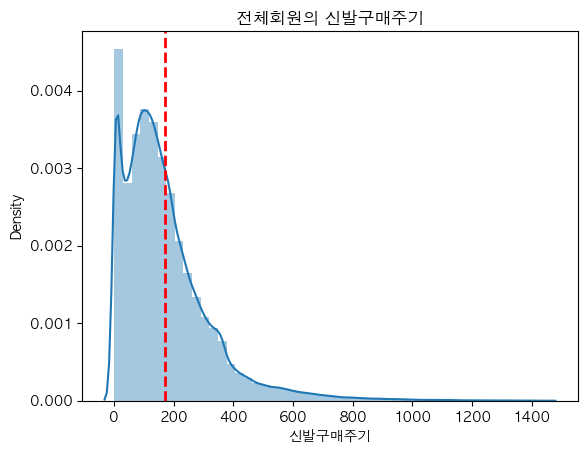

In [ ]:
import seaborn as sns

sns.distplot(df3['신발구매주기'])
plt.axvline(x=df3['신발구매주기'].mean(), color='r', linestyle='--', linewidth=2)
plt.title("전체회원의 신발구매주기")

<AxesSubplot:xlabel='신발구매주기', ylabel='Count'>

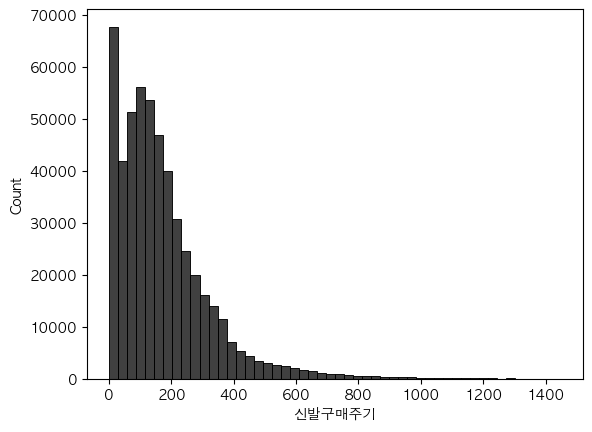

In [ ]:
import seaborn as sns
sns.histplot(data = df3['신발구매주기'], bins=50, color="black") # 히스토그램 그래프 그리기

In [ ]:
def period(x):
    if x>365 : 
        return '5.1년 이상'
    elif x>270:
        return '4.9개월 이상 12개월 미만'
    elif x>180:
        return '3.6개월 이상 9개월 미만'
    elif x>90:
        return '2.3개월 이상 6개월 미만'
    else:
        return '1.3개월 미만'

df3['신발구매주기2'] = df3['신발구매주기'].apply(period) 

In [ ]:
buy = df3.groupby(['신발구매주기2'],as_index = False).agg({'신발구매주기':'count'}).sort_values(by=['신발구매주기2'], ascending = True)
buy['ratio'] = buy.신발구매주기 /  buy.신발구매주기.sum() * 100
buy

In [ ]:
#구매주기 별 회원수
fig = px.bar(buy, 
              x='신발구매주기2', 
              y='신발구매주기', 
              title='구매주기 별 회원수', color="신발구매주기2", text_auto='.3s')
fig.update_layout(xaxis_title='구매주기',
                  yaxis_title='회원 수')
fig.show()

## 구매주기 별 신발구매횟수

In [ ]:
df3 = df3[['고유번호', '신발구매주기', '신발구매주기2']]

In [ ]:
temp = order[order.카테고리1 =='신발']
data5 = temp.groupby('고유번호', as_index = False).agg({'구매일자':'nunique'})
data5.columns = ['고유번호', '신발구매횟수']
df4 = pd.merge(df3, data5, on ='고유번호', how='left')

In [ ]:
def period(x):
    if x>=5:
        return '5번 이상'
    elif x==4:
        return '4번'
    elif x==3:
        return '3번'
    else :
        return '2번'

df4['구매횟수2'] = df4['신발구매횟수'].apply(period) 

In [ ]:
buy = df4.groupby(['신발구매주기2','구매횟수2'],as_index = False).agg({'신발구매주기':'count'}).sort_values(by=['신발구매주기2'], ascending = True)
fig = px.bar(buy, x="신발구매주기2", y="신발구매주기", color="구매횟수2", title="구매횟수가 2번인 경우가 많음",text_auto='.2s',
               color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(xaxis_title='구매주기',
                  yaxis_title='회원 수')
fig.show()

In [ ]:
buy = df4.groupby(['신발구매주기2','구매횟수2'],as_index = False).agg({'신발구매주기':'count'}).sort_values(by=['신발구매주기2'], ascending = True)
buy.rename(columns = {'신발구매주기' : '회원 수'}, inplace = True)
buy

In [ ]:
buy = df4.groupby(['신발구매주기2','구매횟수2'],as_index = False).agg({'신발구매주기':'count'}).sort_values(by=['신발구매주기2'], ascending = True)


fig = px.bar(buy, x="구매횟수2", y="신발구매주기", color="신발구매주기2", title="ㅇㅇ",text_auto='.2s',
               color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(xaxis_title='구매횟수',
                  yaxis_title='회원 수')
fig.show()

In [ ]:
buy = df4.groupby(['신발구매주기2','구매횟수2'],as_index = False).agg({'신발구매주기':'count'}).sort_values(by=['신발구매주기2'], ascending = True)
buy.rename(columns = {'신발구매주기' : '회원 수'}, inplace = True)
buy

## 구매 후 현재까지 비활동 기간
- 2022년 12월 31일 - 회원의 가장 최신 구매기간 

In [ ]:
data4 = user_info[['고유번호', '비구매기간']]

In [ ]:
print('회원들의 평균 비구매기간은',  round(data4.비구매기간.mean(),3) ,'일 입니다') # 즉, 200일간 활동을 안하고있다는 뜻

회원들의 평균 비구매기간은 200.141 일 입니다


<AxesSubplot:xlabel='비구매기간', ylabel='Probability'>

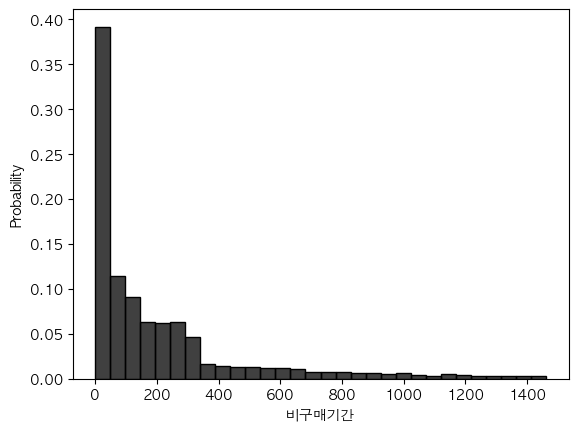

In [ ]:
import seaborn as sns
sns.histplot(data = data4.비구매기간, bins=30, color="black", stat = "probability") # 히스토그램 그래프 그리기

In [ ]:
def period(x):
    if x>720:
        return '04.2년 이상'
    elif x>360:
        return '04.1년 이상'
    elif x>180:
        return '03.6개월 이상'
    elif x>90:
        return '02.3개월 이상'
    else :
        return '01.3개월 이하'

data4['비구매기간2'] = data4['비구매기간'].apply(period) 
data4

In [ ]:
#비구매기간
buy = data4.groupby(['비구매기간2'],as_index = False).agg({'비구매기간':'count'}).sort_values(by=['비구매기간2'], ascending = True)
buy['퍼센트'] = buy['비구매기간'] / buy['비구매기간'].sum() *100
buy

## 일자별 구매 현황

In [ ]:
order['구매연도'] = order['구매일자'].dt.year
order['월'] = order['구매일자'].dt.month
order['구매일자'] = order['구매일자'].astype(str)
order['구매연월'] = order['구매일자'].str[:7]

In [ ]:
buy = order.groupby(['구매연월'],as_index = False).agg({'고유번호':'count'}).sort_values(by=['구매연월'], ascending = True).reset_index(drop=True)

fig = px.line(buy, 
              x='구매연월', 
              y='고유번호', 
              title='연월 별 구매현황')
fig.update_layout(xaxis_title='연월',
                  yaxis_title='카운트')
fig.show()

In [ ]:
buy = order.groupby(['구매연월'],as_index = False).agg({'고유번호':'count'}).sort_values(by=['구매연월'], ascending = True).reset_index(drop=True)
buy['퍼센트'] = buy['고유번호'] / buy['고유번호'].sum() *100
buy['연도'] = buy['구매연월'].str[:4].astype(str)
buy['월'] = buy['구매연월'].str[5:].astype(int)

In [ ]:
# plotting
fig = px.line(buy, 
              x='월', 
              y='고유번호', 
              title='월별 구매현황 - 패턴 o', color = '연도',
              color_discrete_sequence=px.colors.qualitative.Dark24)
fig.update_layout(xaxis_title='월',
                  yaxis_title='카운트')
fig.show()

In [ ]:
buy[buy['연도'] == '2022'].iloc[:,:3]

In [ ]:
# plotting
buy = order.groupby(['구매연도'],as_index = False).agg({'고유번호':'count'}).sort_values(by=['구매연도'], ascending = True).reset_index(drop=True)

fig = px.line(buy, 
              x='구매연도', 
              y='고유번호', 
              title='연도별 구매흐름')
fig.update_layout(xaxis_title='연도',
                  yaxis_title='카운트')
fig.show()

In [ ]:
buy

## 구매 시 평일/주말 비율

In [ ]:
order['구매일자'] = pd.to_datetime(order['구매일자'], errors='coerce')
order['week'] = order['구매일자'].dt.weekday
order['주말여부'] = np.where(order['week']<=4, '평일', '주말')

In [ ]:
order['요일'] = '요일'
order['요일'] = np.where(order['week']==0, '1.월요일', order['요일'])
order['요일'] = np.where(order['week']==1, '2.화요일', order['요일'])
order['요일'] = np.where(order['week']==2, '3.수요일', order['요일'])
order['요일'] = np.where(order['week']==3, '4.목요일', order['요일'])
order['요일'] = np.where(order['week']==4, '5.금요일', order['요일'])
order['요일'] = np.where(order['week']==5, '6.토요일', order['요일'])
order['요일'] = np.where(order['week']==6, '7.일요일', order['요일'])

In [ ]:
weekday = order.groupby(['요일'],as_index = False).agg({'고유번호':'count'}).sort_values(by=['요일'], ascending = True)
weekday['퍼센트'] = weekday['고유번호'] / weekday['고유번호'].sum() *100
weekday

In [ ]:
# plotting
fig = px.bar(weekday, 
              x='요일', 
              y='퍼센트', 
              title='요일별 구매건수', color = '요일', text_auto='.3s')
fig.update_layout(xaxis_title='요일',
                  yaxis_title='퍼센트')
fig.show()